# WeatherPy
----

### Observations
The data was collected to get current weather information through openweather API.

Except for maximum temperature, other weather conditions such as humidity, cloudiness, and windspeed seemed to not be effected by latitude.

This is further confirmed with the linear regression added to the wind speed northern and southern hemisphere graphs.
There was a very slight positive linear regession for cloudiness for both hemisphers.

The relationship between humidity and latitude had a negative linear regression for the northern hemisphere while it was positive for the southern hemisphere but it wasn't by much.

The linear regression confirmed that maximum temperature and latitude had a strong negative relationship for the northern hemisphere while the southern hemisphere had a strong positive relationship.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
weather_stas_df = output_data_file

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### START OF API CALL. DON'T RUN AGAIN.

In [6]:
# Keeping count of number of cities
count = 0
set_num = 0
error = 0

#get current time
t0 = time.time()

# set up lists to hold response info
city_name = []
country = []
max_temp = []
min_temp = []
feels_like = []
date = []
lat = []
lon = []
humidity = []
cloudiness = []
wind_speed = []

# print the header for the data loop
print('Beginning Data Retrieval')
print('--------------------------------')

# loop through cities and and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record {count} of Set {set_num} | {city_name}.")
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        max_temp.append(response["main"]["temp_max"])
        min_temp.append(response["main"]["temp_min"])
        feels_like.append(response["main"]["feels_like"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
    except Exception as not_found:
        print("City not found. Skipping...")
        continue

    # loop a few cities per minute to avoid getting API suspended    
    if count == 45:
        t1 = time.time()
        count = 1
        set_num +=1
        time.sleep(60-(t1-t0))
        t0 = time.time()

Beginning Data Retrieval
--------------------------------
Processing Record 0 of Set 0 | [].
Processing Record 0 of Set 0 | ['Upernavik'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate'].
Processing Re

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad'].
Processing Record 0 of Set 0 | ['Upernavi

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bet

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi'].
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wel

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

City not found. Skipping...
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira'

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

City not found. Skipping...
Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira'

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

Processing Record 0 of Set 0 | ['Upernavik', 'Norman Wells', 'Rāmgarh', 'Camocim', 'Umm Kaddadah', 'Saint-Joseph', 'Atuona', 'Høyanger', 'Margate', 'Kapaa', 'Klaksvík', 'Yellowknife', 'Punta Arenas', 'Qaanaaq', 'Maracaibo', 'Srednekolymsk', 'Mataura', 'Artvin Province', 'Hermanus', 'Saskylakh', 'Muros', 'Butaritari', 'Hithadhoo', 'Khani', 'Bethel', 'Benxi', 'Mahébourg', 'Bengkulu', 'Japura', 'Ardakān', 'Mar del Plata', 'Saint-Philippe', 'Belmonte', 'Port Macquarie', 'La Libertad', 'Khatanga', 'Tommot', 'Arraial do Cabo', 'Hasaki', 'Balkhash', 'Busselton', 'Puerto Ayora', 'Hilo', 'Goderich', 'Paamiut', 'Dikson', 'Karema', 'Rikitea', 'Bredasdorp', 'Port Augusta', 'Albany', 'Mabaruma', 'Katsuura', 'Ribeira Grande', 'Khilok', 'Bogorodskoye', 'Ulladulla', 'Mandurah', 'New Norfolk', 'Arroyos y Esteros', 'Bluff', 'Rabo de Peixe', 'Laguna', 'Ushuaia', 'Umba', "Severo-Kuril'sk", 'Carnarvon', 'Mossamedes', 'Qaqortoq', 'Sawtell', 'Colomi', 'Huarmey', 'Jalu', 'Cidreira', 'Lorengau', "Ol'ga", 'Iqal

### END OF API CALL. DON'T RUN AGAIN.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# saved df to csv
weather_data.to_csv("../output_data/weather_data.csv", index=False, header=True)

In [7]:
# put variables from API call into a df
weather_dict = {"City":city_name, "Cloudiness":cloudiness, 
                "Country":country, "Date":date, "Humidity":humidity,   
                "Lat":lat, "Lng":lon, "Max Temp":max_temp, "Min Temp": min_temp,
                "Feels Like":feels_like,"Wind Speed":wind_speed}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Feels Like,Wind Speed
0,Upernavik,0,GL,1598655460,71,72.79,-56.15,4.64,4.64,-2.30,7.04
1,Norman Wells,90,CA,1598655397,66,65.28,-126.83,11.00,11.00,6.98,4.10
2,Rāmgarh,7,IN,1598655037,87,23.63,85.52,22.88,22.88,25.20,2.38
3,Camocim,14,BR,1598655037,72,-2.90,-40.84,26.10,26.10,24.28,8.33
4,Umm Kaddadah,71,SD,1598655037,55,13.60,26.69,28.30,28.30,30.31,1.35


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

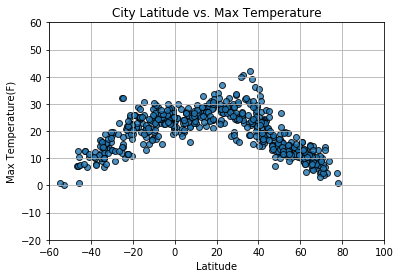

Analysis: Based off of the graph above, it looks like there's a relationship between max temperature and latitude.
As latitude increases from the begining of the graph, the temperature also rises. It is then reversed starting around 
latitude 20, with an exception of a few outliers around the 30-40 latitude mark.
    


In [65]:
# Create a Scatter Plot for latitude & max temp. Save as png.
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']

plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.savefig('../output_data/Lat_MaxTemp.png')
plt.grid(True)
plt.xlim([-60, 100])
plt.ylim([-20, 60])
plt.show()

# State findings
print("""Analysis: Based off of the graph above, it looks like there's a relationship between max temperature and latitude.
As latitude increases from the begining of the graph, the temperature also rises. It is then reversed starting around 
latitude 20, with an exception of a few outliers around the 30-40 latitude mark.
    """)

#### Latitude vs. Humidity Plot

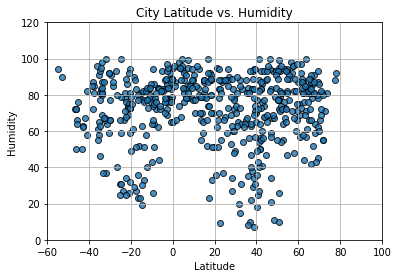

Analysis: Based off of the graph above, it shows that humidity isn't affected by latitude.


In [66]:
# Create a Scatter Plot for latitude & humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']

plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../output_data/Lat_Humidity.png')
plt.grid(True)
plt.xlim([-60, 100])
plt.ylim([0, 120])
plt.show()

# State findings
print("Analysis: Based off of the graph above, it shows that humidity isn't affected by latitude.")

#### Latitude vs. Cloudiness Plot

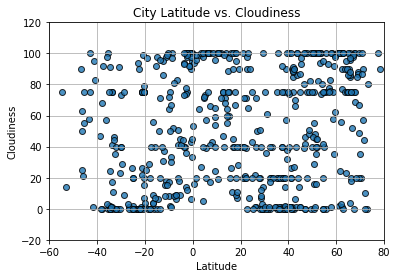

Analysis: Based off of the graph above, there's no relationship between cloudiness and latitude.


In [67]:
# Create a Scatter Plot for latitude & cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']

plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('../output_data/Lat_Cloudiness.png')
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-20, 120])
plt.show()

# State findings
print("Analysis: Based off of the graph above, there's no relationship between cloudiness and latitude.")

#### Latitude vs. Wind Speed Plot

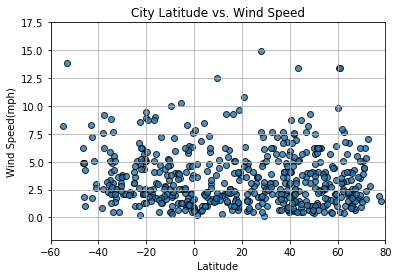

Analysis: Based off of the graph above, the wind speed is not related to latitude.


In [68]:
# Create a Scatter Plot for latitude & wind speed
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']

plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig('../output_data/Lat_WindSpeed.png')
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-2, 17.5])
plt.show()

# State findings
print("Analysis: Based off of the graph above, the wind speed is not related to latitude.")

## Linear Regression

Create Northern and Southern Hemisphere DataFrames

In [52]:
# split Latitude into north and south hemispheres
north_hemi = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) > 0, :]
south_hemi = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

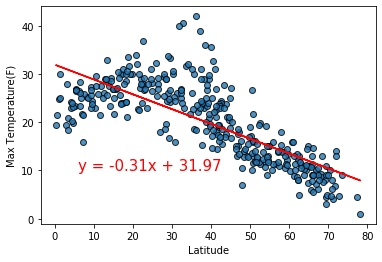

In [53]:
# Make x & y values for max temp & latitude
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']    

# Perform a linear regression on max temperature vs. latitude & get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

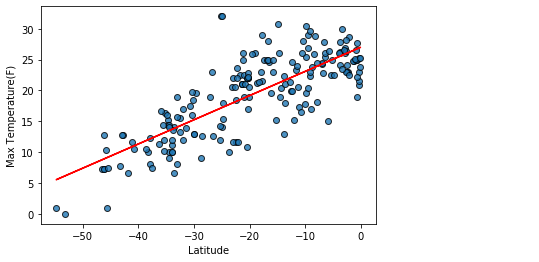

In [54]:
# Make x & y values for max temp & latitude
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']    

# Perform a linear regression on max temperature vs. latitude & get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

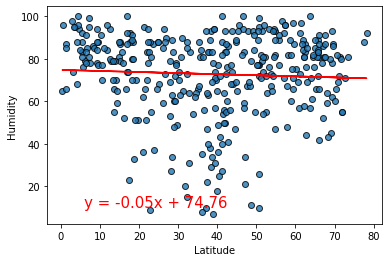

In [55]:
# Make x & y values for max tem & latitude
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

# Perform a linear regression on humidity vs. latitude & get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

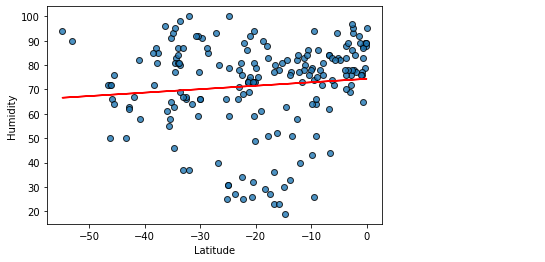

In [62]:
# Make x & y values for humidity & latitude
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

# Perform a linear regression on humidity vs. latitude & get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

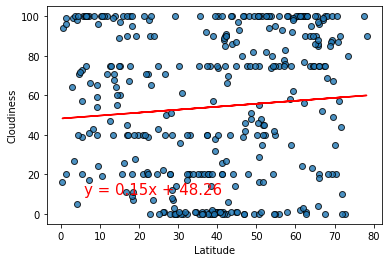

In [57]:
# Make x & y values for cloudiness & latitude
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

# Perform a linear regression on cloudiness vs. latitude & get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

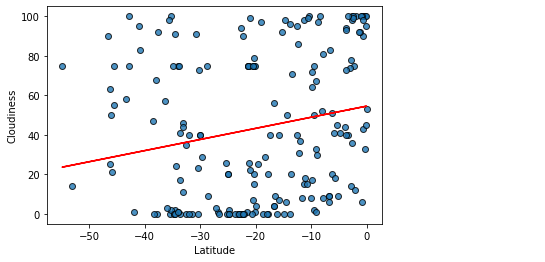

In [58]:
# Make x & y values for cloudiness & latitude
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']

# Perform a linear regression on cloudiness vs. latitude & get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

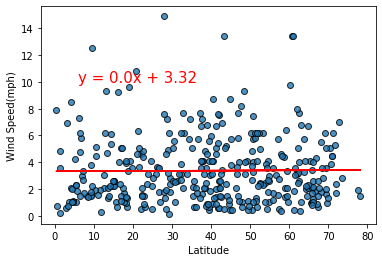

In [60]:
# Make x & y values for wind speed & latitude
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

# Perform a linear regression on cloudiness vs. latitude & get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

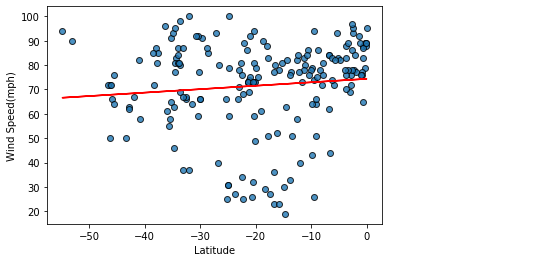

In [63]:
# Make x & y values for wind speed & latitude
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

# Perform a linear regression on wind speed vs. latitude & get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values,edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()